In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_samples,davies_bouldin_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import random

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/rms_mel.csv')
print(df.shape)
df.head()

(1200, 43)


,genre,file_name,rms_mean,rms_var,chroma_stft_mean,chroma_stft_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth,spectral_bandwidth.1,...,mel_spec11,mel_spec12,mel_spec13,mel_spec14,mel_spec15,mel_spec16,mel_spec17,mel_spec18,mel_spec19,mel_spec20
0,blues,blues.00000.wav,0.127820,0.003445,0.409089,0.089115,1727.351474,142000.224759,1965.724086,91115.763237,...,-11.619318,-13.248830,-15.205503,-17.721975,-21.459818,-23.451105,-25.575070,-26.389164,-29.996510,-38.826023
1,blues,blues.00001.wav,0.093903,0.002756,0.438725,0.092898,1450.864079,378294.241015,1972.260927,228136.751110,...,-23.548323,-24.655277,-26.339476,-28.471700,-33.291893,-33.236996,-32.744590,-32.470802,-35.806477,-44.577250
2,blues,blues.00002.wav,0.173220,0.003548,0.420921,0.084918,1493.930518,175858.135048,1698.946080,94216.071611,...,-9.212287,-13.057380,-16.085901,-16.665873,-19.833254,-22.363142,-24.911274,-27.586584,-31.426540,-40.359447
3,blues,blues.00003.wav,0.138990,0.006927,0.547953,0.071065,996.820708,183117.456205,1524.151953,177087.696285,...,-23.135990,-25.736160,-29.430140,-30.392696,-32.626990,-35.162300,-36.888172,-38.613697,-41.235264,-48.588070
4,blues,blues.00004.wav,0.089781,0.002618,0.334440,0.087125,1749.111185,359184.325599,1699.714246,105136.447967,...,-16.692339,-18.763874,-21.235283,-20.536680,-22.504978,-25.444075,-28.113205,-32.240480,-38.584164,-48.707350


## Data Preprocessing

In [ ]:
label_df=df[['genre','file_name']]
df=df.drop(['genre','file_name'],axis=1)
df_columns=list(df.columns.values)

In [ ]:
# Standarization
scaler = StandardScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(df,columns=df_columns)

### Original Data Plotting

In [ ]:
# t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space
tsne=TSNE(n_components=2, random_state=42,n_iter=500)
data=tsne.fit_transform(df)

In [ ]:
data=pd.DataFrame(data,columns=['dimension1','dimension2'])
data['label']=label_df['genre']
data

,dimension1,dimension2,label
0,10.832804,-5.249886,blues
1,4.799427,17.540192,blues
2,7.392575,-9.540916,blues
3,7.650798,11.688623,blues
4,13.950130,1.125962,blues
...,...,...,...
1195,13.711573,-5.138379,rock
1196,14.065637,-5.611243,rock
1197,14.327713,-5.979835,rock
1198,10.068666,17.865383,rock


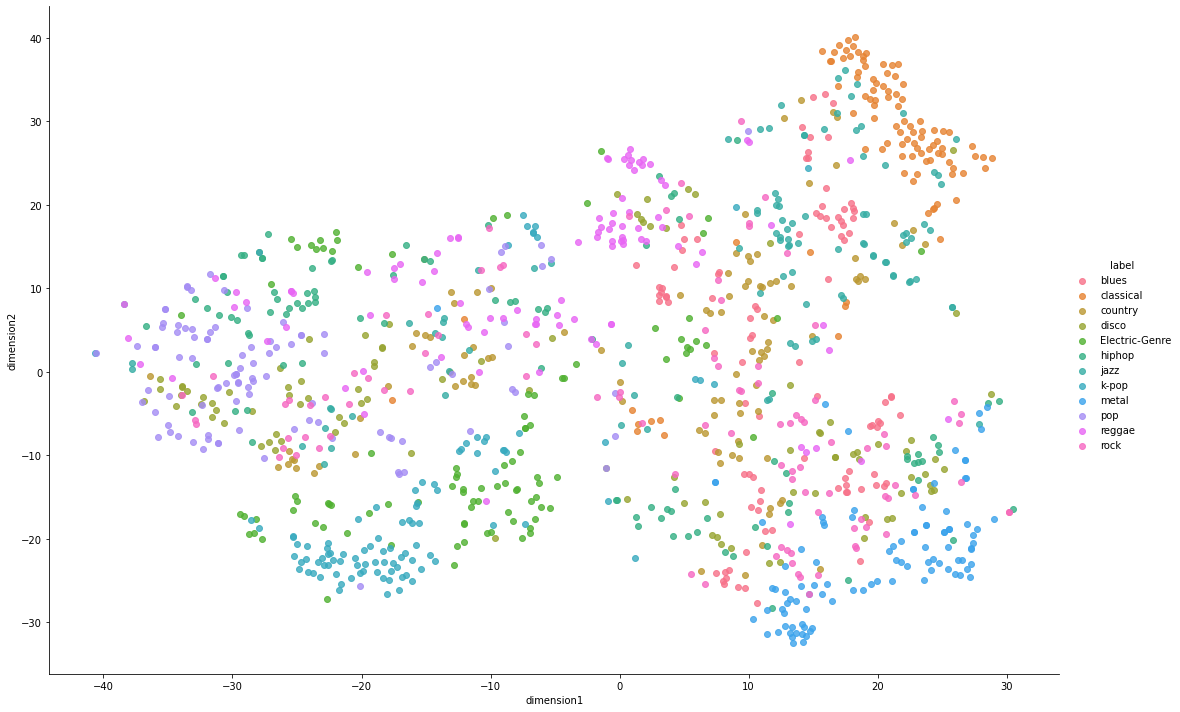

In [ ]:
sns.lmplot(x='dimension1', y='dimension2', data=data, hue='label', fit_reg=False,height=10,aspect=1.5)
plt.savefig('original_data.png', dpi=400)

### Feature reduction (PCA)

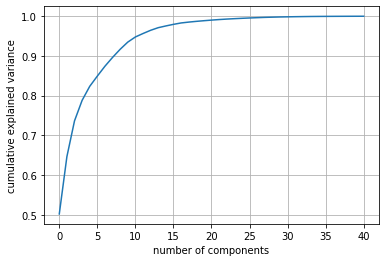

<Figure size 720x432 with 0 Axes>

In [ ]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.grid(True)
plt.ylabel('cumulative explained variance')
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
component=2
pca=PCA(n_components=component)
principalComponents = pca.fit_transform(df)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Total Variance Explained: 64.65


In [ ]:
columns=[f"Component{i}" for i in range(1,component+1)]
finalDf = pd.DataFrame(data = principalComponents
             , columns =columns)
finalDf.head()

,Component1,Component2
0,-0.009524,-2.527839
1,4.068887,0.287263
2,-1.093543,-3.186039
3,4.138469,-1.152286
4,1.521557,-1.740693


In [ ]:
df.head()

,rms_mean,rms_var,chroma_stft_mean,chroma_stft_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth,spectral_bandwidth.1,spectral_rolloff,spectral_rolloff.1,...,mel_spec11,mel_spec12,mel_spec13,mel_spec14,mel_spec15,mel_spec16,mel_spec17,mel_spec18,mel_spec19,mel_spec20
0,-0.275774,-0.298143,-0.561871,0.426789,-0.564912,-0.921522,-0.498890,-0.634887,-0.488923,-0.794292,...,0.363131,0.287158,0.226905,0.104376,-0.042495,0.011891,-0.002801,0.076750,-0.029772,-0.295521
1,-0.693375,-0.415635,-0.232904,0.753454,-0.967844,-0.392849,-0.486287,0.363032,-0.736709,0.392022,...,-1.019251,-0.970964,-0.951362,-0.984755,-1.182342,-0.886230,-0.640417,-0.441323,-0.500052,-0.714917
2,0.283225,-0.280526,-0.430532,0.064423,-0.905082,-0.845770,-1.013253,-0.612308,-0.994789,-0.803176,...,0.642068,0.308275,0.133735,0.211377,0.114201,0.111741,0.056233,-0.025254,-0.145524,-0.407342
3,-0.138242,0.295378,0.979570,-1.131714,-1.629533,-0.829528,-1.350265,-0.008756,-1.580301,-0.511357,...,-0.971468,-1.090185,-1.278436,-1.179384,-1.118289,-1.062929,-1.008924,-0.964615,-0.939479,-1.007397
4,-0.744128,-0.439197,-1.390501,0.254999,-0.533201,-0.435605,-1.011772,-0.532775,-0.672154,-0.336607,...,-0.224751,-0.321147,-0.411205,-0.180802,-0.143181,-0.171018,-0.228528,-0.421703,-0.724889,-1.016095


### PCA Data Plotting

In [ ]:
finalDf.head()

,Component1,Component2
0,-0.009524,-2.527839
1,4.068887,0.287263
2,-1.093543,-3.186039
3,4.138469,-1.152286
4,1.521557,-1.740693


In [ ]:
# t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space
#tsne=TSNE(n_components=2, random_state=42,n_iter=500)
#data=tsne.fit_transform(finalDf)

data=finalDf
data['label']=label_df['genre']
data

,Component1,Component2,label
0,-0.009524,-2.527839,blues
1,4.068887,0.287263,blues
2,-1.093543,-3.186039,blues
3,4.138469,-1.152286,blues
4,1.521557,-1.740693,blues
...,...,...,...
1195,1.315424,-1.854729,rock
1196,0.883751,-2.412938,rock
1197,0.144434,-2.688046,rock
1198,4.929392,-0.923695,rock


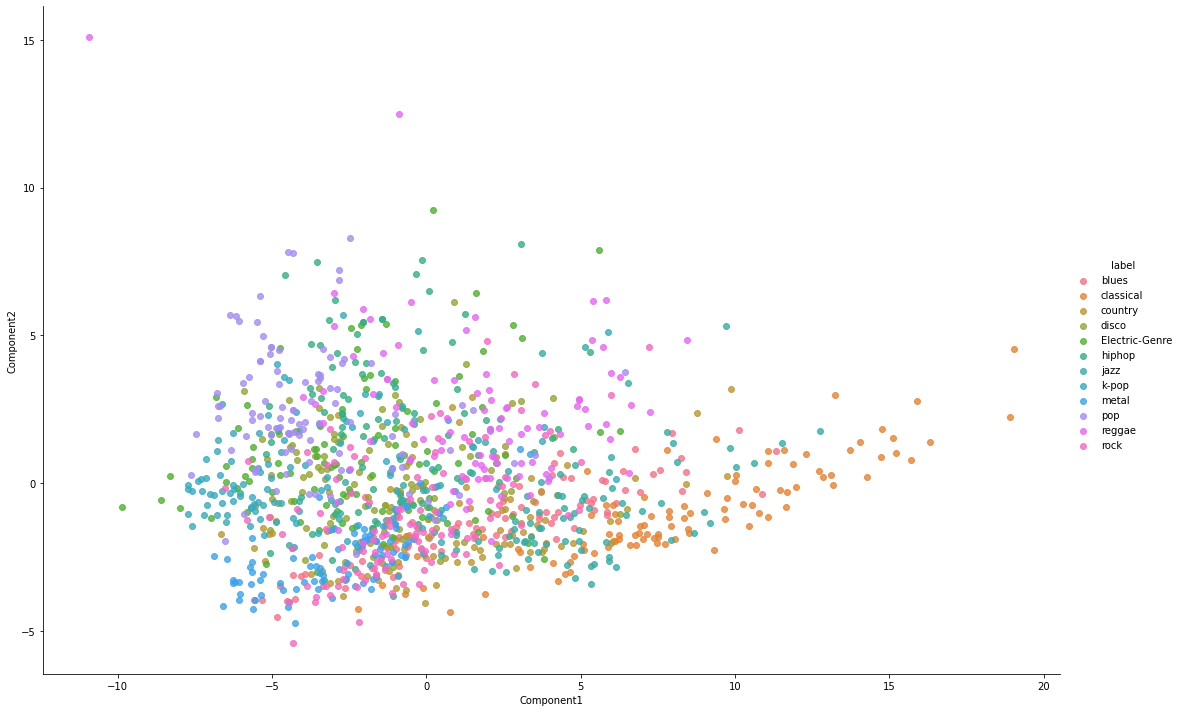

In [ ]:
sns.lmplot(x='Component1', y='Component2', data=data, hue='label', fit_reg=False,height=10,aspect=1.5)
plt.savefig('pca_data.png', dpi=400)

## K Mean Clustering

In [ ]:
finalDf.head()

,Component1,Component2,label
0,-0.009524,-2.527839,hiphop
1,4.068887,0.287263,classical
2,-1.093543,-3.186039,hiphop
3,4.138469,-1.152286,classical
4,1.521557,-1.740693,classical


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# map genre to int values
genre_labels=finalDf.label.unique()
genre_dict = dict(zip(genre_labels, range(len(genre_labels))))
finalDf.label=finalDf.label.map(genre_dict)
finalDf

,Component1,Component2,label
0,-0.009524,-2.527839,0
1,4.068887,0.287263,1
2,-1.093543,-3.186039,0
3,4.138469,-1.152286,1
4,1.521557,-1.740693,1
...,...,...,...
1195,1.315424,-1.854729,1
1196,0.883751,-2.412938,0
1197,0.144434,-2.688046,0
1198,4.929392,-0.923695,2


In [ ]:
def plot(clusters,score):
    plt.scatter(clusters,score,s=100,edgecolor='k')
    plt.xticks(clusters)
    plt.title("Silhouette_Score with number of clusters")
    plt.ylabel('Silhouette_Score')
    plt.xlabel('Number of Clusters')
    plt.grid(True)
    plt.show()

In [ ]:
finalDf.head()

,Component1,Component2,label
0,-0.009524,-2.527839,0
1,4.068887,0.287263,1
2,-1.093543,-3.186039,0
3,4.138469,-1.152286,1
4,1.521557,-1.740693,1


In [ ]:
label_df=pd.DataFrame(data=finalDf['label'],columns=['label'])
label_df

,label
0,0
1,1
2,0
3,1
4,1
...,...
1195,1
1196,0
1197,0
1198,2


In [ ]:
finalDf.drop(['label'],inplace=True,axis=1)

In [ ]:
finalDf.head()

,Component1,Component2
0,-0.009524,-2.527839
1,4.068887,0.287263
2,-1.093543,-3.186039
3,4.138469,-1.152286
4,1.521557,-1.740693


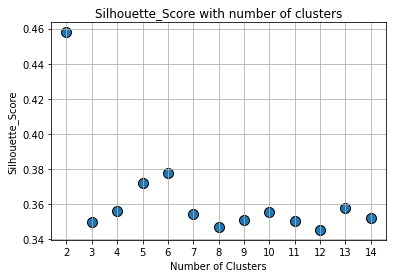

In [ ]:
# PCA df
clusters=[int(i) for i in range(2,15)]
score=[]

for cluster in clusters:
    km=KMeans(n_clusters=cluster,algorithm='auto')
    labels = km.fit_predict(finalDf)
    silhouette_vals = np.mean(silhouette_samples(finalDf, labels))
    score.append(silhouette_vals)

plot(clusters,score)

In [ ]:
n_init=[int(i) for i in range(5,20,4)]
algo=tuple(['elkan','auto'])
score=0
ans=['',0]

for al in algo:
    for n in n_init:
        km=KMeans(n_clusters=9,n_init=n,algorithm=al)
        labels = km.fit_predict(finalDf)
        silhouette_vals = np.mean(silhouette_samples(finalDf, labels))
        if silhouette_vals>score:
            score=silhouette_vals
            ans[0]=al
            ans[1]=n

        print(ans)

['elkan', 5]
['elkan', 9]
['elkan', 9]
['elkan', 9]
['elkan', 9]
['auto', 9]
['auto', 9]
['auto', 9]


In [ ]:
print(score)
print(ans)

0.353312910961963
['auto', 9]


In [ ]:
km=KMeans(n_clusters=9,n_init=9,algorithm='auto')
labels = km.fit_predict(finalDf)
silhouette_vals = np.mean(silhouette_samples(finalDf, labels))
print(silhouette_vals)

0.3506613428509849


In [ ]:
labels

array([5, 0, 5, ..., 5, 3, 0], dtype=int32)

In [ ]:
score=np.mean(davies_bouldin_score(finalDf,labels))
score

0.8348190466260119

In [ ]:
labelDf=pd.DataFrame(labels,columns=['predictions'])
labelDf

,predictions
0,5
1,0
2,5
3,0
4,0
...,...
1195,0
1196,5
1197,5
1198,3


In [ ]:
data['label']=labelDf['predictions']
genre_dict = dict(zip(range(len(genre_labels)),genre_labels))
data.label=data.label.map(genre_dict)
data.head()

,Component1,Component2,label
0,-0.009524,-2.527839,k-pop
1,4.068887,0.287263,hiphop
2,-1.093543,-3.186039,k-pop
3,4.138469,-1.152286,hiphop
4,1.521557,-1.740693,hiphop


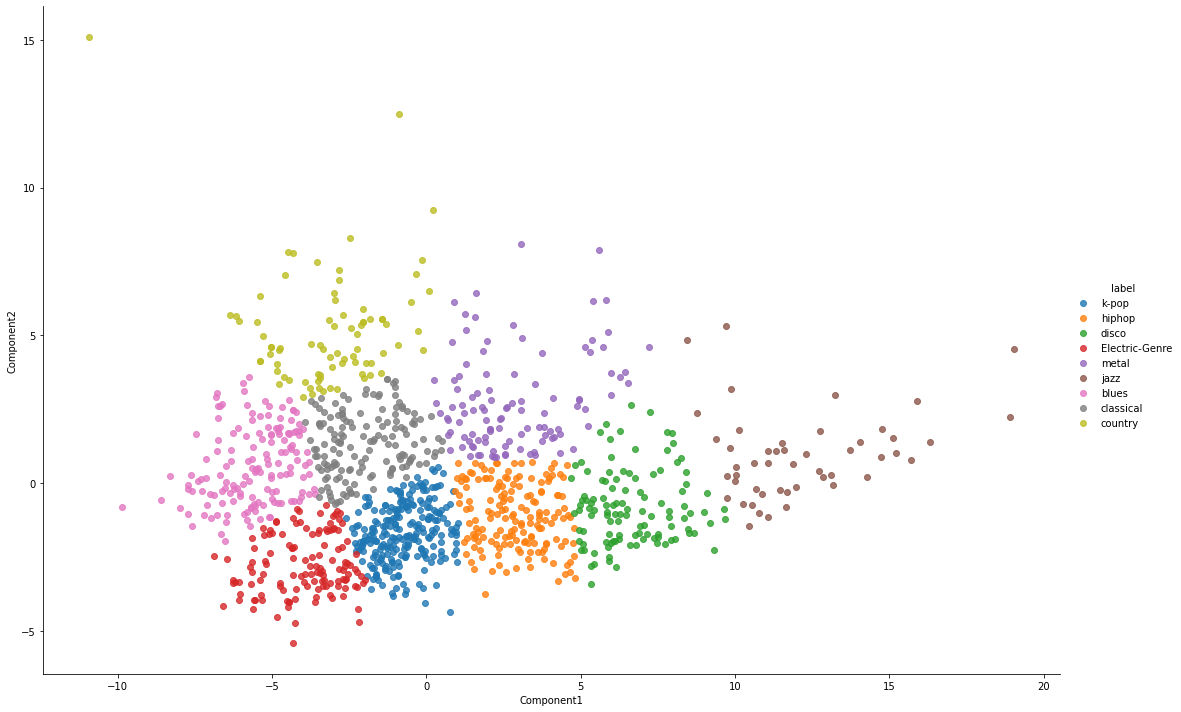

In [ ]:
sns.lmplot(x='Component1', y='Component2', data=data, hue='label', fit_reg=False,height=10,aspect=1.5)
plt.savefig('KMeans.png', dpi=400)

In [ ]:
import pickle
fileName="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/kmean.pkl"
pickle.dump(km,open(fileName, "wb"))

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
finalDf.head()

,Component1,Component2,label
0,-0.009524,-2.527839,k-pop
1,4.068887,0.287263,hiphop
2,-1.093543,-3.186039,k-pop
3,4.138469,-1.152286,hiphop
4,1.521557,-1.740693,hiphop


In [ ]:
finalDf.drop(['label'],inplace=True,axis=1)

In [ ]:
finalDf.head()

,Component1,Component2
0,-0.009524,-2.527839
1,4.068887,0.287263
2,-1.093543,-3.186039
3,4.138469,-1.152286
4,1.521557,-1.740693


In [ ]:
# to find optimum EPS
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(finalDf) # fitting the data to the object
distances,indices=nbrs.kneighbors(finalDf) # finding the nearest neighbours

In [ ]:
print(distances)
print(indices)

[[0.         0.10127946]
 [0.         0.14762657]
 [0.         0.16537292]
 ...
 [0.         0.22219155]
 [0.         0.17458215]
 [0.         0.1139492 ]]
[[   0  295]
 [   1  911]
 [   2  889]
 ...
 [1197    0]
 [1198   22]
 [1199  605]]


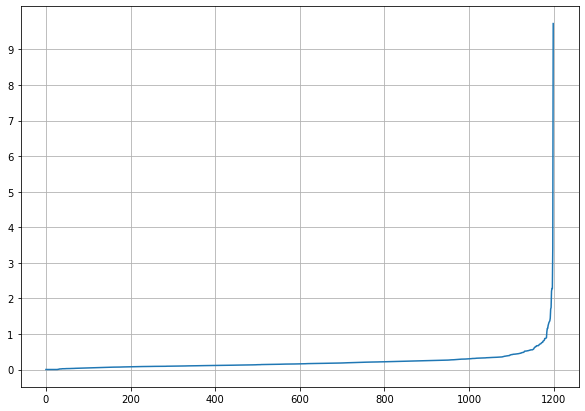

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (10,7) # setting the figure size
plt.plot(distances) # plotting the distances
plt.yticks(range(0,10), [i for i in range(0,10)])
plt.grid(True)
plt.show() # showing the plot

In [ ]:
# From the above plot, we note the maximum curvature of the curve is about 0.8 to 1.5, and thus we picked our Eps as in range(0.8,1.5).

In [ ]:
def plot(clusters,score):
    plt.scatter(clusters,score,s=100,edgecolor='k')
    plt.xticks(clusters)
    plt.title("Silhouette_Score with number of clusters")
    plt.ylabel('Silhouette_Score')
    plt.xlabel('Number of Clusters')
    plt.grid(True)
    plt.figure(figsize=(26, 24))
    plt.show()

In [ ]:
from sklearn import metrics
score=[]
for eps_val in np.arange(0.5,1.5,0.05):
    db=DBSCAN(eps=eps_val,min_samples=4,metric='euclidean')
    model=db.fit(finalDf)
    label=model.labels_
    silhouette_vals = np.mean(silhouette_samples(finalDf, label))
   
    
    #Calculating the number of clusters
    sample_cores=np.zeros_like(label,dtype=bool)
    sample_cores[db.core_sample_indices_]=True
    n_clusters=len(set(label))- (1 if -1 in label else 0)
    print('No of clusters:',n_clusters," eps_val:",eps_val," score:",silhouette_vals)

No of clusters: 18  eps_val: 0.5  score: -0.2422683399444708
No of clusters: 15  eps_val: 0.55  score: -0.15880944800833585
No of clusters: 13  eps_val: 0.6000000000000001  score: -0.08755397320196602
No of clusters: 9  eps_val: 0.6500000000000001  score: -0.10316296810918256
No of clusters: 7  eps_val: 0.7000000000000002  score: -0.003482567494165227
No of clusters: 5  eps_val: 0.7500000000000002  score: 0.06379301096312938
No of clusters: 5  eps_val: 0.8000000000000003  score: 0.07789724845143944
No of clusters: 6  eps_val: 0.8500000000000003  score: 0.05209449146631027
No of clusters: 6  eps_val: 0.9000000000000004  score: 0.05886118611518448
No of clusters: 3  eps_val: 0.9500000000000004  score: 0.23918207559504823
No of clusters: 2  eps_val: 1.0000000000000004  score: 0.45442276702575024
No of clusters: 1  eps_val: 1.0500000000000005  score: 0.4713797473177555
No of clusters: 1  eps_val: 1.1000000000000005  score: 0.48792120159248936
No of clusters: 1  eps_val: 1.1500000000000006 

In [ ]:
# MinPoints: We can obtain the minimum number of Points to be used to recognize a cluster, as follows:
#If the dataset has two dimensions, use the min sample per cluster as 4.
#If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension
# 0.28
db=DBSCAN(eps=0.6,min_samples=4,metric='euclidean')
model=db.fit(finalDf)

In [ ]:
label=model.labels_
silhouette_vals = np.mean(silhouette_samples(finalDf, label))
print(silhouette_vals)

-0.08755397320196602


In [ ]:
np.unique(label)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
import pickle
fileName="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/DBSCAN.pkl"
pickle.dump(km,open(fileName, "wb"))

## Birch 

In [ ]:
from sklearn.cluster import Birch

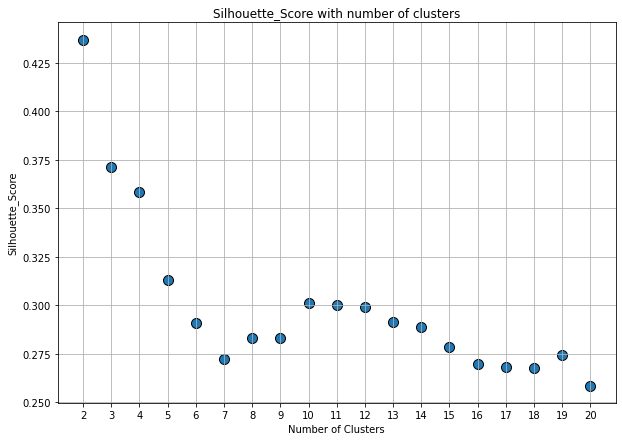

In [ ]:
# Silhouette_Score, the larger the better
score=[]
clusters=[int(i) for i in range(2,21)]
for n_clusters in clusters:
  labels = Birch(n_clusters =n_clusters).fit_predict(finalDf)
  silhouette_vals = silhouette_samples(finalDf, labels)
  score.append(np.mean(silhouette_vals))

plt.scatter(clusters,score,s=100,edgecolor='k')
plt.xticks(clusters)
plt.title("Silhouette_Score with number of clusters")
plt.ylabel('Silhouette_Score')
plt.xlabel('Number of Clusters')
plt.grid(True)
plt.show()

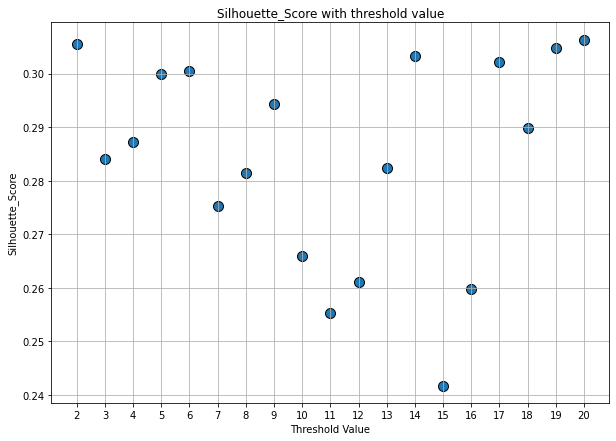

In [ ]:
# from above observation, number of clusters=11
# threshold  : The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold. 
#Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.
# Silhouette_Score, the larger the better
score=[]
threshold=[int(i) for i in range(2,21)]
for thresh_val in threshold:
  labels = Birch(n_clusters =11, threshold=thresh_val/10).fit_predict(finalDf)
  silhouette_vals = silhouette_samples(finalDf, labels)
  score.append(np.mean(silhouette_vals))

plt.scatter(threshold,score,s=100,edgecolor='k')
plt.xticks(threshold)
plt.title("Silhouette_Score with threshold value")
plt.ylabel('Silhouette_Score')
plt.xlabel('Threshold Value')
plt.grid(True)
plt.show()

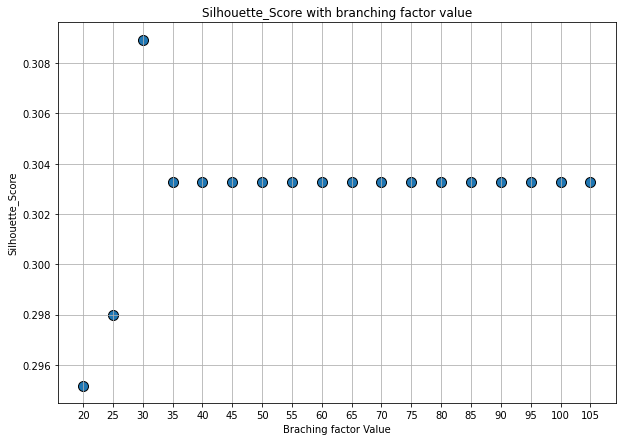

In [ ]:
# from above plots, threshold value=1.4 and n_clusters=11
score=[]
braching_factor=[int(i) for i in range(20,110,5)]
for bf in braching_factor:
  labels = Birch(n_clusters =11, threshold=1.4,branching_factor=bf).fit_predict(finalDf)
  silhouette_vals = silhouette_samples(finalDf, labels)
  score.append(np.mean(silhouette_vals))

plt.scatter(braching_factor,score,s=100,edgecolor='k')
plt.xticks(braching_factor)
plt.title("Silhouette_Score with branching factor value")
plt.ylabel('Silhouette_Score')
plt.xlabel('Braching factor Value')
plt.grid(True)
plt.show()

In [ ]:
# threshold value=1.4 and n_clusters=11 and branching_factor=30
labels = Birch(n_clusters =11, threshold=1.4,branching_factor=30).fit_predict(finalDf)
silhouette_vals = silhouette_samples(finalDf, labels)
print(np.mean(silhouette_vals))

0.30894202667357074


In [ ]:
# # putting all value together
# clusters=np.array([int(i) for i in range(5,21,2)])
# threshold=np.array([int(i) for i in range(3,21,2)])
# branching_factor=np.array([int(i) for i in range(20,110,5)])

# cluster_ans=0
# thresh_ans=0
# bf_ans=0
# score=0

# for cluster in clusters:
#     for thresh in threshold:
#         for bf in branching_factor:
#             labels = Birch(n_clusters =cluster, threshold=thresh/10,branching_factor=bf).fit_predict(finalDf)
#             silhouette_vals = silhouette_samples(finalDf, labels)
#             score_val=(np.mean(silhouette_vals))
#             print(score_val,cluster)
#             if score_val>score:
#                 cluster_ans=cluster
#                 thresh_ans=thresh
#                 bf_ans=bf
#                 score=score_val

In [ ]:
# clusters=5 , threshold_value=1.9, branching_factor=20, silhouette_score=0.36241107610771534

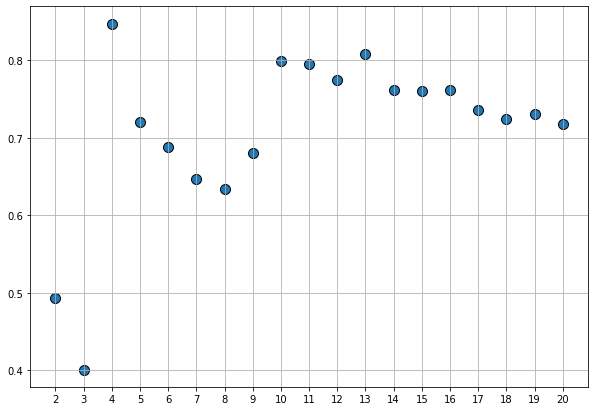

In [ ]:
# davies_bouldin_score, the lower the better
score=[]
clusters=[int(i) for i in range(2,21)]
for n_clusters in clusters:
  labels = Birch(n_clusters =n_clusters, threshold=1.9,branching_factor=20).fit_predict(finalDf)
  score_val = davies_bouldin_score(finalDf,labels)
  score.append(np.mean(score_val))

plt.scatter(clusters,score,s=100,edgecolor='k')
plt.xticks(clusters)
plt.grid(True)
plt.show()

### Testing

In [ ]:
# clusters=8 from davies_bouldin_score
# cluster =5 from parameter tuning
# number of clusters=11 from silhouette_score
labels = Birch(n_clusters =9, threshold=1.9,branching_factor=20).fit_predict(finalDf)
silhouette_vals = silhouette_samples(finalDf, labels)
score=(np.mean(silhouette_vals))
print(score)

0.3189494268302881


In [ ]:
score=np.mean(davies_bouldin_score(finalDf,labels))
score

0.6800893491264727

In [ ]:
label_df=pd.DataFrame(labels,columns=['prediction'])
data = pd.concat([finalDf, label_df[['prediction']]], axis = 1)
data

,Component1,Component2,prediction
0,-0.009524,-2.527839,8
1,4.068887,0.287263,0
2,-1.093543,-3.186039,8
3,4.138469,-1.152286,0
4,1.521557,-1.740693,0
...,...,...,...
1195,1.315424,-1.854729,0
1196,0.883751,-2.412938,8
1197,0.144434,-2.688046,8
1198,4.929392,-0.923695,0


In [ ]:
genre_dict = dict(zip(range(len(genre_labels)),genre_labels))
data.prediction=data.prediction.map(genre_dict)

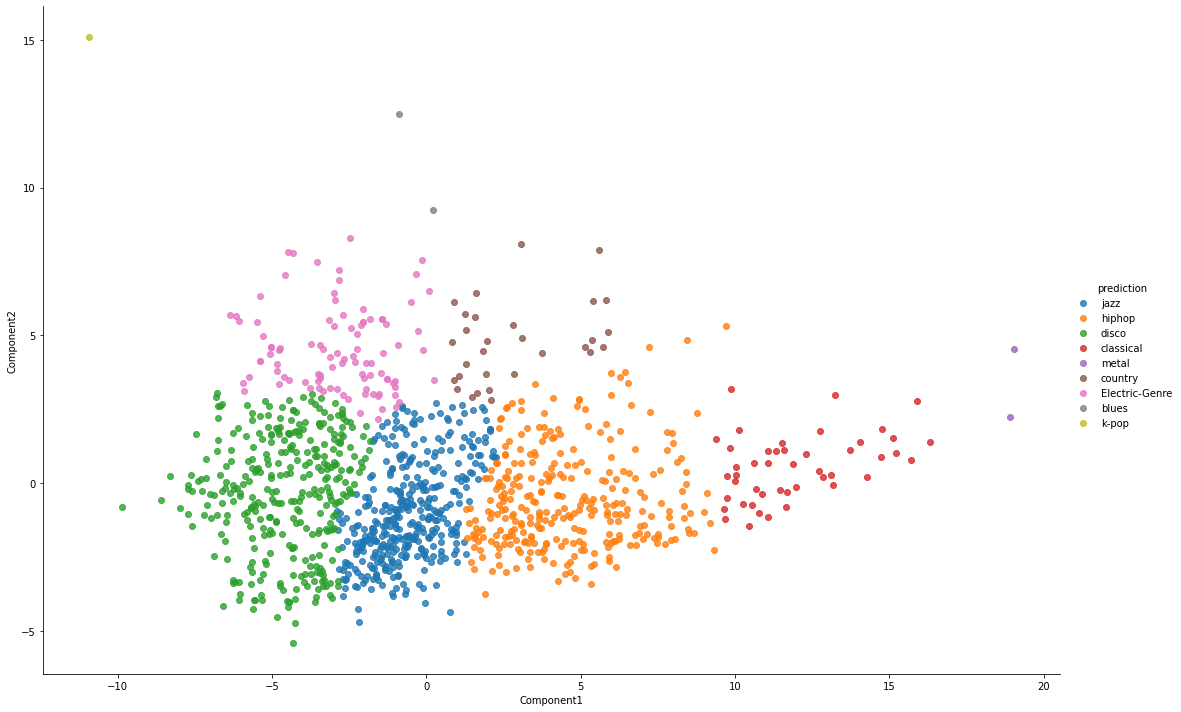

In [ ]:
sns.lmplot(x='Component1', y='Component2', data=data, hue='prediction', fit_reg=False,height=10,aspect=1.5)
plt.savefig('Birch.png', dpi=400)

In [ ]:
label_df.head()

,prediction
0,8
1,0
2,8
3,0
4,0


[303, 46, 30, 334, 97, 1, 2, 2, 385, 0, 0, 0]


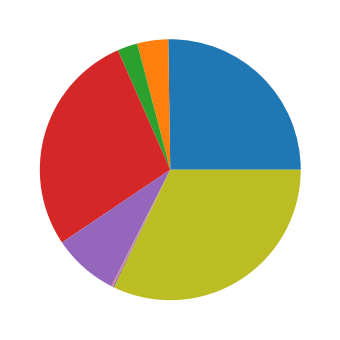

In [ ]:
gmm_clusters_count = []
for i in range(12):
    gmm_clusters_count.append(len(label_df[label_df['prediction'] == i]))

print(gmm_clusters_count)
fig = plt.figure(figsize =(10,6))
plt.pie(gmm_clusters_count)
plt.show()

In [ ]:
import pickle
fileName="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/BIRCH.pkl"
pickle.dump(km,open(fileName, "wb"))

## Guassian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
# Choose parameter for training
# TODO: Use Silhouette_Score, BIC, davies_bouldin_score to find optimum number of clusters

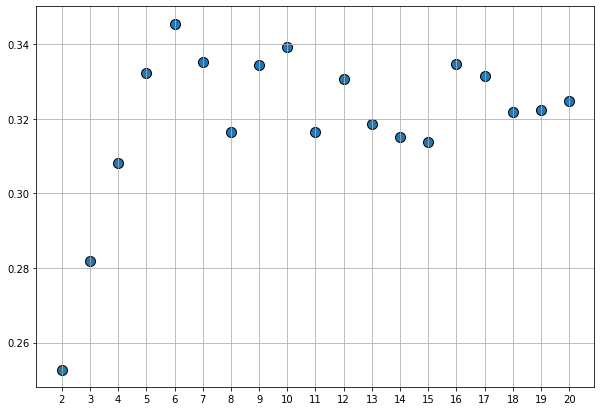

In [ ]:
# Silhouette_Score, the larger the better
score=[]
clusters=[int(i) for i in range(2,21)]
for n_clusters in clusters:
  labels = GaussianMixture(n_components =n_clusters).fit_predict(finalDf)
  silhouette_vals = silhouette_samples(finalDf, labels)
  score.append(np.mean(silhouette_vals))

plt.scatter(clusters,score,s=100,edgecolor='k')
plt.xticks(clusters)
plt.grid(True)
plt.show()

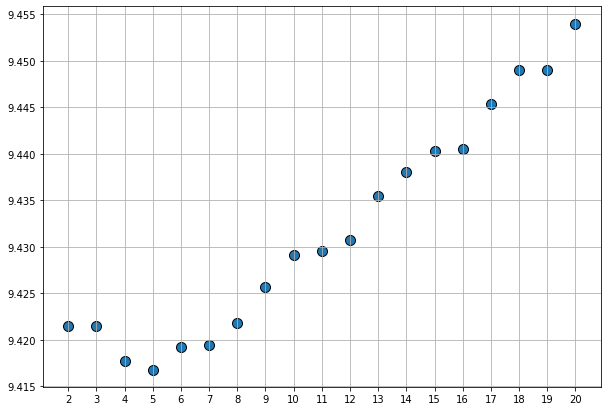

In [ ]:
# BIC Score, the lower the better.
score=[]
clusters=[int(i) for i in range(2,21)]
for n_clusters in clusters:
  gmm = GaussianMixture(n_components =n_clusters).fit(finalDf)
  score_val = np.log(gmm.bic(finalDf))
  score.append(np.mean(score_val))

plt.scatter(clusters,score,s=100,edgecolor='k')
plt.xticks(clusters)
plt.grid(True)
plt.show()

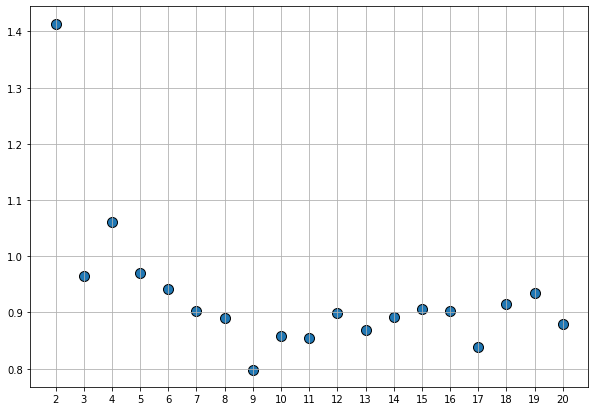

In [ ]:
# davies_bouldin_score, the lower the better
score=[]
clusters=[int(i) for i in range(2,21)]
for n_clusters in clusters:
  labels = GaussianMixture(n_components =n_clusters).fit_predict(finalDf)
  score_val = davies_bouldin_score(finalDf,labels)
  score.append(np.mean(score_val))

plt.scatter(clusters,score,s=100,edgecolor='k')
plt.xticks(clusters)
plt.grid(True)
plt.show()

spherical 0.34719100597976893 0.8600736877478481


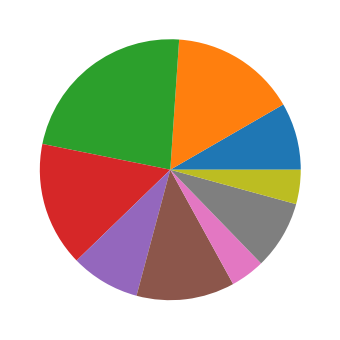

tied 0.3014708254748726 0.8430243430060815


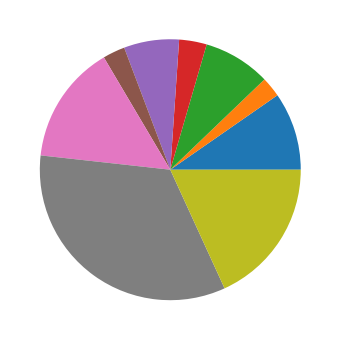

diag 0.33905523966528295 0.8711123207527601


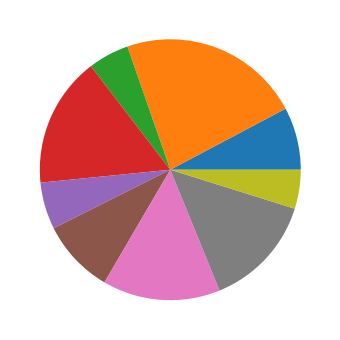

full 0.32676769333447897 0.7984623240356631


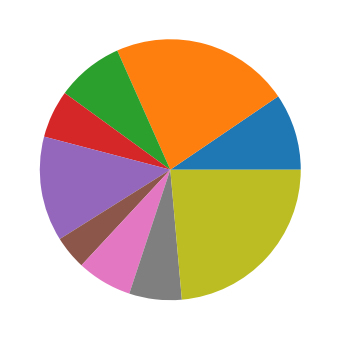

In [ ]:
# so from above figures we can conclude
# optimal number of clusters from davies_bouldin_score -  9,10,12
# from BIC score -9,10
# from Silhouette_Score - 9,12

# optimal cluster - 9
covariance_type=['spherical', 'tied', 'diag','full']
for cov in covariance_type:
    labels = GaussianMixture(n_components =9,covariance_type=cov).fit_predict(finalDf)
    silhouette_vals = silhouette_samples(finalDf, labels)
    davies_score=davies_bouldin_score(finalDf,labels)
    
    dummy_df=pd.DataFrame(data=labels,columns=['predictions'])
    gmm_clusters_count = []
    for i in range(10):
        
        gmm_clusters_count.append(len(dummy_df[dummy_df['predictions'] == i]))

    fig = plt.figure(figsize =(10,6))
    plt.pie(gmm_clusters_count)
    print(cov,np.mean(silhouette_vals),davies_score)
    plt.show()

In [ ]:
model= GaussianMixture(n_components=9,covariance_type='spherical').fit(finalDf)

In [ ]:
finalDf.head()

,Component1,Component2
0,-0.009524,-2.527839
1,4.068887,0.287263
2,-1.093543,-3.186039
3,4.138469,-1.152286
4,1.521557,-1.740693


In [ ]:
labels=model.predict(finalDf)
finalDf['predictions']=labels
finalDf

,Component1,Component2,predictions
0,-0.009524,-2.527839,3
1,4.068887,0.287263,7
2,-1.093543,-3.186039,3
3,4.138469,-1.152286,7
4,1.521557,-1.740693,7
...,...,...,...
1195,1.315424,-1.854729,7
1196,0.883751,-2.412938,3
1197,0.144434,-2.688046,3
1198,4.929392,-0.923695,7


### Performance

In [ ]:
from sklearn.metrics import silhouette_samples
from sklearn import metrics

In [ ]:
# The Silhouette Score and Silhouette Plot are used to measure the separation distance between clusters
silhouette_vals = silhouette_samples(finalDf, labels)

In [ ]:
# The Silhouette Score is calculated using the mean intra-cluster distance (i) and the mean nearest-cluster distance (n) for each sample. 
# The Silhouette Coefficient for a sample is (n - i) / max(i, n). 
np.mean(silhouette_vals)

0.5204395860143668

In [ ]:
score=np.mean(davies_bouldin_score(finalDf,labels))
score

0.6729649841068324

[80, 95, 89, 265, 264, 50, 50, 176, 131, 0, 0, 0]


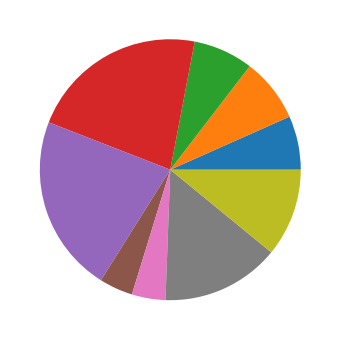

In [ ]:
gmm_clusters_count = []
for i in range(12):
    gmm_clusters_count.append(len(finalDf[finalDf['predictions'] == i]))

print(gmm_clusters_count)
fig = plt.figure(figsize =(10,6))
plt.pie(gmm_clusters_count)
plt.show()

In [ ]:
genre_dict = dict(zip(range(len(genre_labels)),genre_labels))
finalDf.predictions=finalDf.predictions.map(genre_dict)

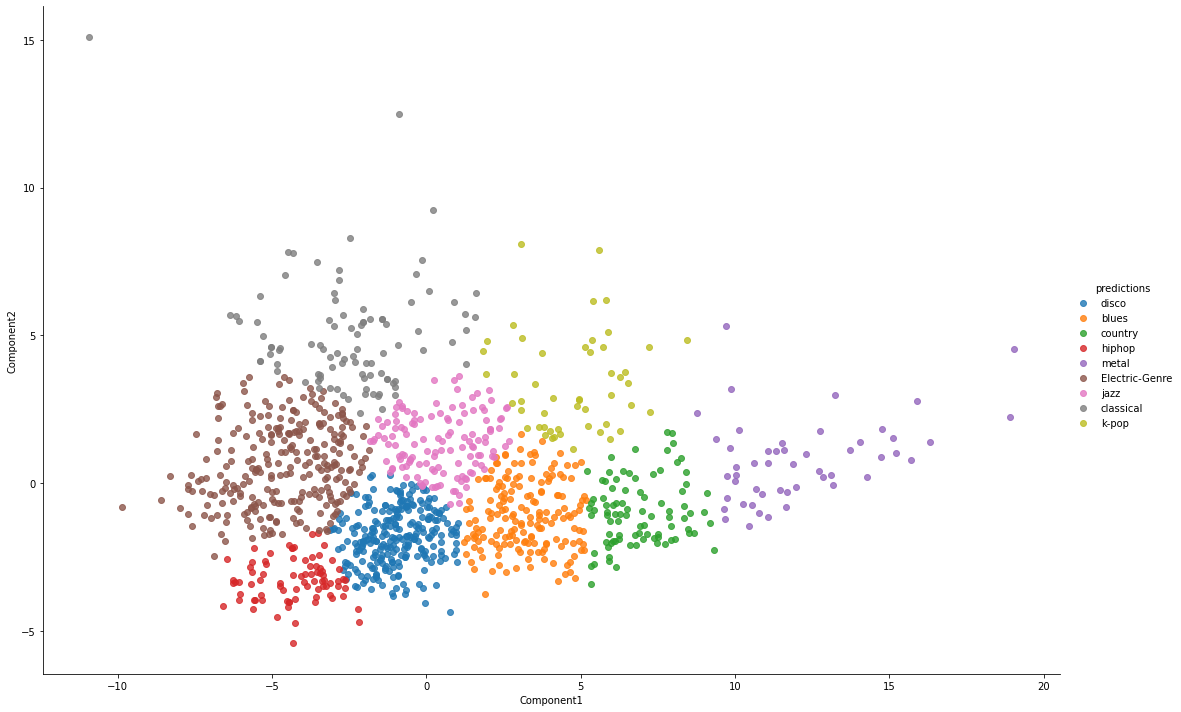

In [ ]:
sns.lmplot(x='Component1', y='Component2', data=finalDf, hue='predictions', fit_reg=False,height=10,aspect=1.5)
plt.savefig('GuassianMixture.png', dpi=400)

In [ ]:
import pickle
fileName="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/Guassian.pkl"
pickle.dump(km,open(fileName, "wb"))

## Recommendation

In [ ]:
import pickle
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')


fileName1="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/kmean.pkl"
kmean=pickle.load(open(fileName1, "rb"))
fileName2="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/BIRCH.pkl"
birch=pickle.load(open(fileName1, "rb"))
fileName3="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/Guassian.pkl"
guassian=pickle.load(open(fileName1, "rb"))
fileName4="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/DBSCAN.pkl"
dbscan=pickle.load(open(fileName1, "rb"))

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/rms_mel.csv')

In [ ]:
finalDf

,Component1,Component2,label
0,-0.009524,-2.527839,blues
1,4.068887,0.287263,blues
2,-1.093543,-3.186039,blues
3,4.138469,-1.152286,blues
4,1.521557,-1.740693,blues
...,...,...,...
1195,1.315424,-1.854729,rock
1196,0.883751,-2.412938,rock
1197,0.144434,-2.688046,rock
1198,4.929392,-0.923695,rock


In [ ]:
finalDf['fileName']=pd.DataFrame(df['file_name'])
finalDf['SongID']=np.array([i for i in range(0,1200)])
finalDf

,Component1,Component2,label,fileName,SongID
0,-0.009524,-2.527839,blues,blues.00000.wav,0
1,4.068887,0.287263,blues,blues.00001.wav,1
2,-1.093543,-3.186039,blues,blues.00002.wav,2
3,4.138469,-1.152286,blues,blues.00003.wav,3
4,1.521557,-1.740693,blues,blues.00004.wav,4
...,...,...,...,...,...
1195,1.315424,-1.854729,rock,rock.00095.wav,1195
1196,0.883751,-2.412938,rock,rock.00096.wav,1196
1197,0.144434,-2.688046,rock,rock.00097.wav,1197
1198,4.929392,-0.923695,rock,rock.00098.wav,1198


In [ ]:
def calculate_distance(all_points,particular_point):
  point1=tuple([particular_point['Component1'],particular_point['Component2']])
  dist=[]
  for index, point in all_points.iterrows():
    
    point2=tuple([point['Component1'],point['Component2']])

    dst = distance.euclidean(point1,point2)

    dist.append(dst)
  
  all_points['distance']=np.array(dist)

  all_points=all_points.sort_values(by=['distance'], ascending=True)

  return all_points.iloc[1:, :]



def same_cluster_data(model,songId):
  newDf = finalDf.copy(deep=True)
  labels=model.labels_
  newDf['predictions']=labels

  clusterId=np.array(newDf['predictions'][newDf.SongID == songId])[0]
  
  all_points=newDf.loc[newDf['predictions'] == clusterId] # all points in same clusters

  particular_point=newDf.loc[newDf['SongID']==songId]


  return calculate_distance(all_points,particular_point)

In [ ]:
#This function select the cluster for a user according the the user choice
def select_song():
    print('Select song id(between 0 to 1199) you would like to listen:')
    l=[]
    for i in range(15):
        l.append(random.randint(0,1200))
    for i in l:
        print(finalDf['SongID'][i] , finalDf['fileName'][i],sep=' ---> ')
        
    print('--------------------------------------------------------------------')
    l = int(input())
    
    return l

In [ ]:
def merge(df1,df2):
  finalDf=pd.DataFrame(columns=['label','fileName','SongID','distance'])

  for index, row in df1.iterrows():   
    if row['SongID'] in df2['SongID']:

      #print(df2._get_value(index,'distance'))
      distance=min(row['distance'],df2._get_value(index,'distance'))
      df2.drop(index,inplace=True)
    else:
      distance=row['distance']
    
    data={'label':row['label'],'fileName':row['fileName'],'SongID':row['SongID'],'distance':distance}
    finalDf=finalDf.append(data, ignore_index = True)

  for index,row in df2.iterrows():
    data={'label':row['label'],'fileName':row['fileName'],'SongID':row['SongID'],'distance':distance}
    finalDf=finalDf.append(data, ignore_index = True)
    
  return finalDf.sort_values(by=['distance'], ascending=True)
    

def get_recommendation(songId):
  y_pred1=same_cluster_data(kmean,songId)
  y_pred2=same_cluster_data(birch,songId)
  y_pred3=same_cluster_data(dbscan,songId)
  y_pred4=same_cluster_data(guassian,songId)

  finalDf1=merge(y_pred1,y_pred2)
  finalDf2=merge(y_pred3,y_pred4)

  ans=merge(finalDf1,finalDf2)

  return ans.head(10)


In [ ]:
# This is the main function which recommend you song
def recommend():
    while True:
        song=select_song()

        ans=get_recommendation(song)

        print(ans['fileName'])
        
        #print(finalDf['fileName'][finalDf.predictions == int(song)].sample(n=10))

        print('--------------------------------------------------------------------')

        user_input=input('Want more!!!!(y/n) : ')

        if user_input=='N' or user_input=='n':
          break
          
recommend()

Select song id(between 0 to 1199) you would like to listen:
134 ---> classical.00034.wav
801 ---> metal.00001.wav
1111 ---> rock.00011.wav
979 ---> pop.00079.wav
912 ---> pop.00012.wav
467 ---> press-pause-walz-main-version-01-38-17207.wav
586 ---> hiphop.00086.wav
684 ---> jazz.00085.wav
587 ---> hiphop.00087.wav
963 ---> pop.00063.wav
277 ---> country.00077.wav
1166 ---> rock.00066.wav
1057 ---> reggae.00057.wav
827 ---> metal.00027.wav
983 ---> pop.00083.wav
--------------------------------------------------------------------
277
0    classical.00053.wav
1         rock.00093.wav
2      country.00098.wav
3    classical.00054.wav
4      country.00066.wav
5    classical.00042.wav
6         rock.00048.wav
7         jazz.00066.wav
8      country.00072.wav
9         rock.00006.wav
Name: fileName, dtype: object
--------------------------------------------------------------------
Want more!!!!(y/n) : n
